In [1]:
# Importing the dataset
dataset <- read.csv("D:\\projectR\\datafiles\\creditcard.csv", header = TRUE,
                stringsAsFactors = FALSE,
                strip.white = TRUE ,
                sep = ',')

In [2]:
dataset<- dataset[c(8,15,20,22,28,31)]

In [3]:
dataset$Class = as.factor(dataset$Class)

In [4]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training.new = subset(dataset, split == TRUE)
test.new = subset(dataset, split == FALSE)
summary(training.new$Class)
summary(test.new$Class)

0      1 
227452    394

0     1 
56863    98

In [5]:
#install.packages("ROSE")
#Implementing oversampling
library(ROSE)
training = ovun.sample(Class~., data = training.new, method = 'over', 
                       N =2*227452 , seed = 1234)$data
summary(training$Class)

Warning message:
"package 'ROSE' was built under R version 3.5.2"Loaded ROSE 0.0-3



0      1 
227452 227452

In [6]:
#logistic model

fit = glm(Class ~ ., data=training, family=binomial)
summary(fit)


Call:
glm(formula = Class ~ ., family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3840  -0.4504  -0.0024   0.0534   2.8388  

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.187903   0.006913 -316.492   <2e-16 ***
V7          -0.193922   0.002968  -65.346   <2e-16 ***
V14         -1.090328   0.004298 -253.662   <2e-16 ***
V19         -0.002625   0.006014   -0.436    0.662    
V21          0.091041   0.005570   16.344   <2e-16 ***
V27          0.001949   0.010851    0.180    0.857    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 630631  on 454903  degrees of freedom
Residual deviance: 206244  on 454898  degrees of freedom
AIC: 206256

Number of Fisher Scoring iterations: 8


In [7]:
#logistic model

fit = glm(Class ~ V14+V7+V21, data=training, family=binomial)
summary(fit)


Call:
glm(formula = Class ~ V14 + V7 + V21, family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3929  -0.4504  -0.0024   0.0535   2.8413  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.187878   0.006911 -316.58   <2e-16 ***
V14         -1.090282   0.004274 -255.09   <2e-16 ***
V7          -0.193706   0.002900  -66.79   <2e-16 ***
V21          0.091103   0.005521   16.50   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 630631  on 454903  degrees of freedom
Residual deviance: 206245  on 454900  degrees of freedom
AIC: 206253

Number of Fisher Scoring iterations: 8


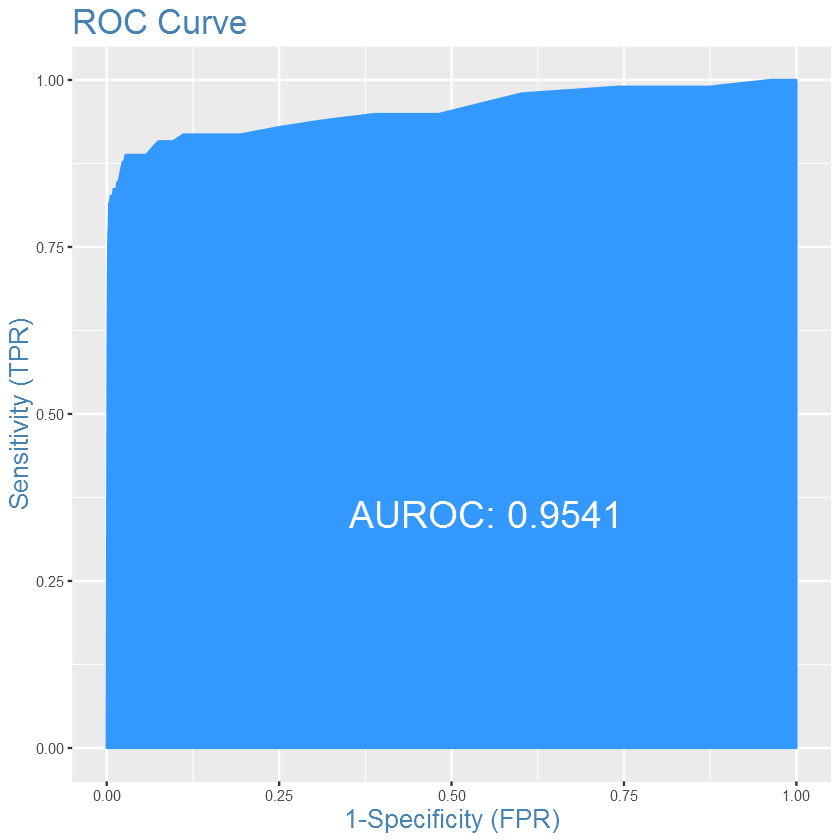

In [8]:
library(InformationValue)
predicted <- predict(fit, test.new, type="response")  # predicted scores
#predicted
plotROC(test.new, predicted)

In [12]:

sensitivity(test.new$Class, predicted, threshold = 0.55)

specificity(test.new$Class, predicted, threshold = 0.55)


confusionMatrix(test.new$Class, predicted > 0.55)

[1] 0.8571429

[1] 0.9810949

,0,1
0,55788,14
1,1075,84


In [13]:
library("e1071")
classifier1 = svm(formula = Class~V14+V7+V19+V21+V27, data = training,
                  type = 'C-classification',
                  kernel = 'radial')
classifier1


Call:
svm(formula = Class ~ ., data = training, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.2 

Number of Support Vectors:  63182


In [15]:
test_pred2 = predict(classifier1, type = 'response', newdata = test.new[,-6])
# Making Confusion Matrix
cm2 = table(test.new[,6], test_pred2)

cm2

   test_pred2
        0     1
  0 56246   617
  1    12    86

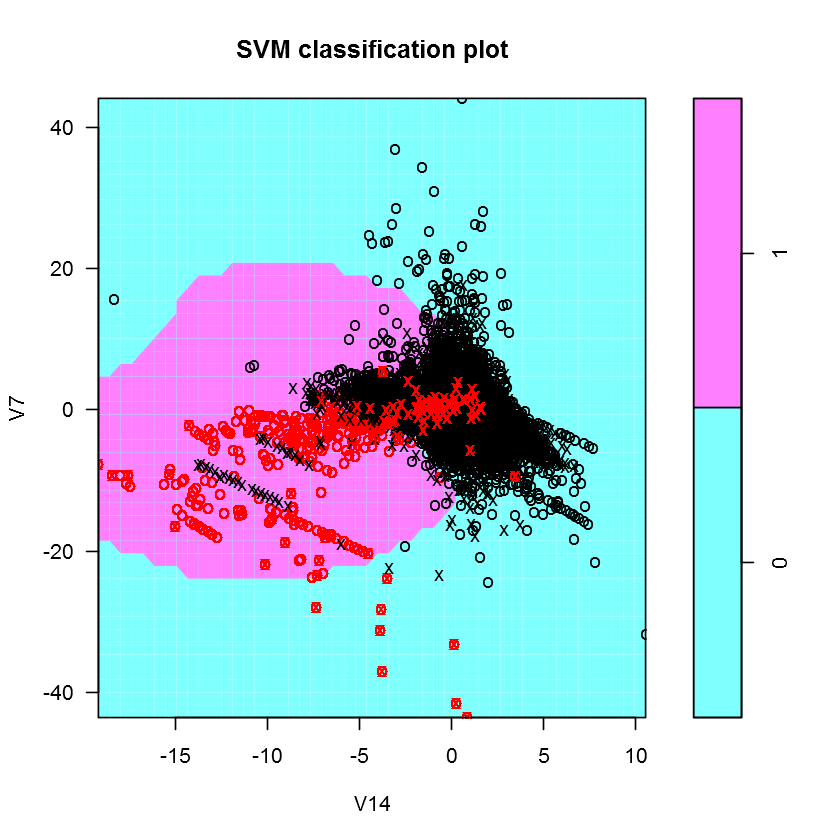

In [16]:
plot(classifier1, training, V7 ~ V14)

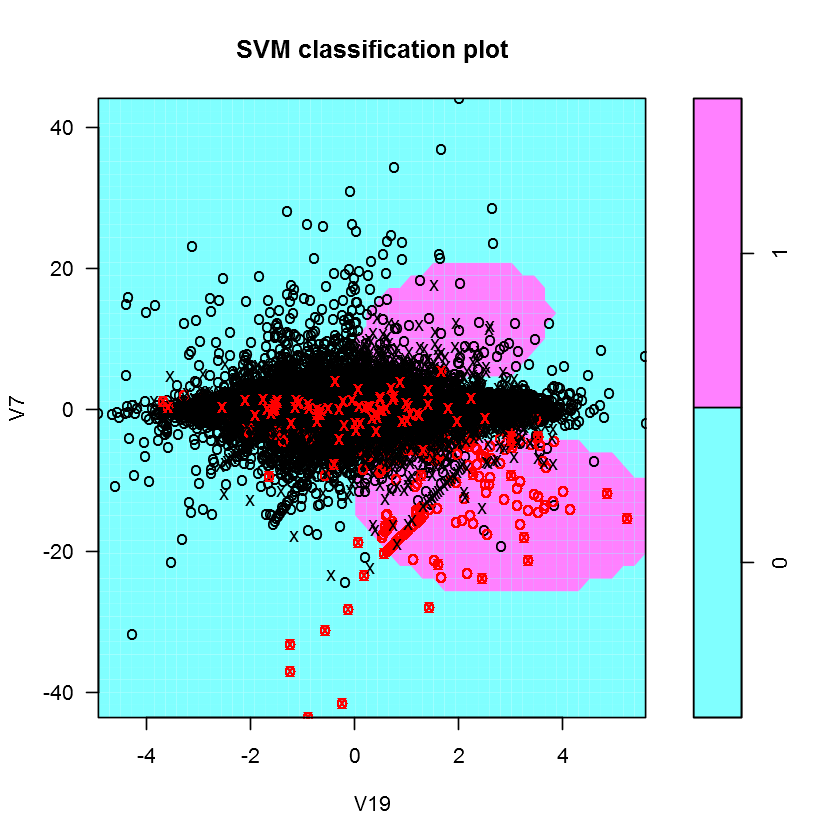

In [17]:
plot(classifier1, training, V7 ~ V19)

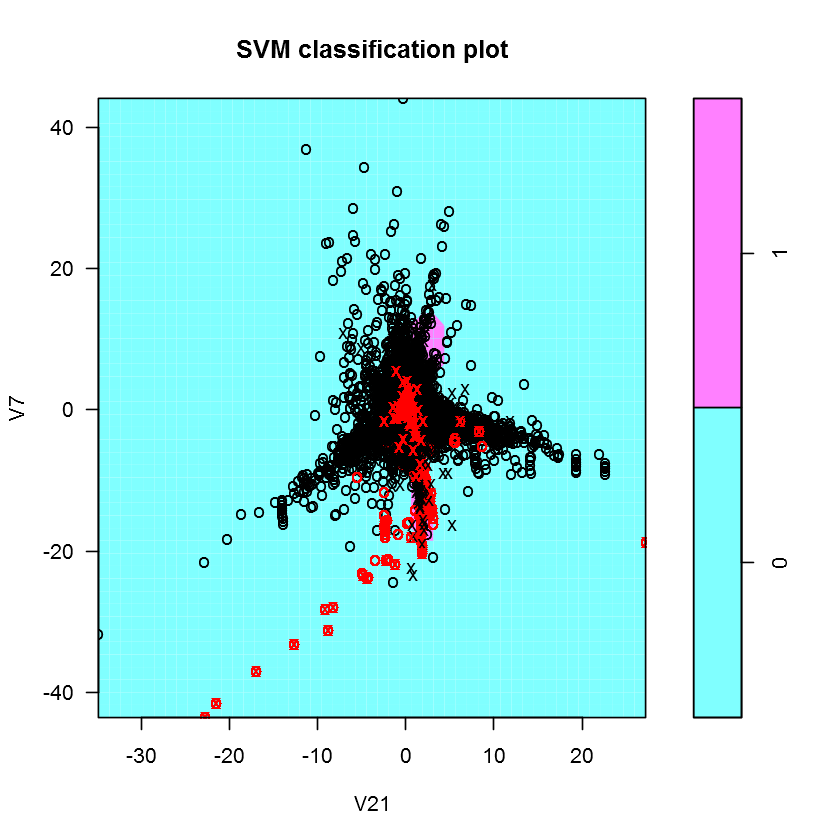

In [18]:
plot(classifier1, training, V7 ~ V21)

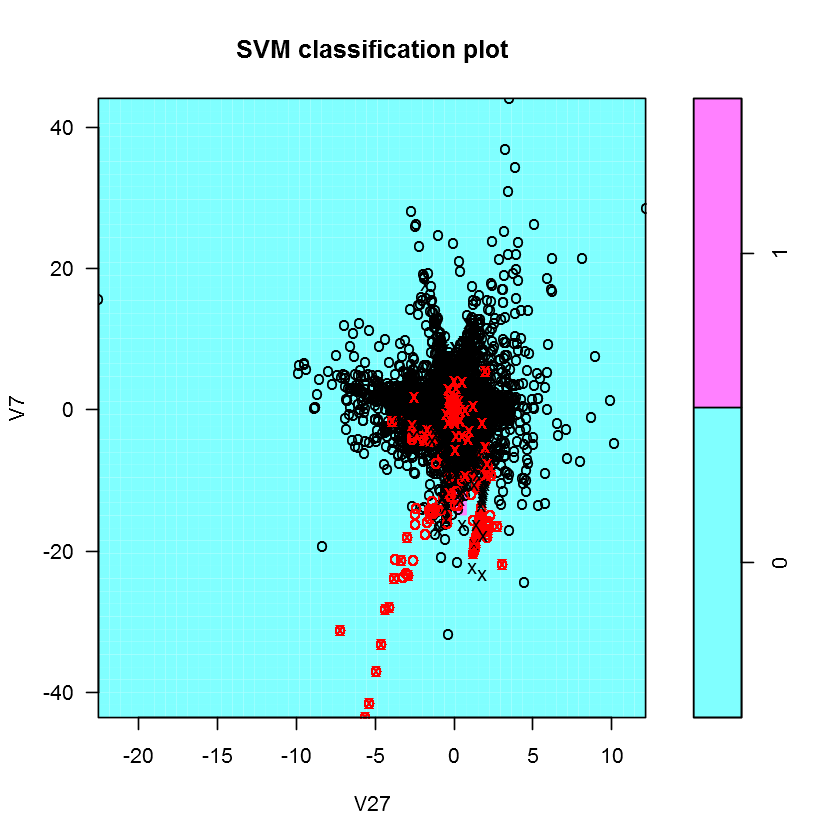

In [19]:
plot(classifier1, training, V7 ~ V27)

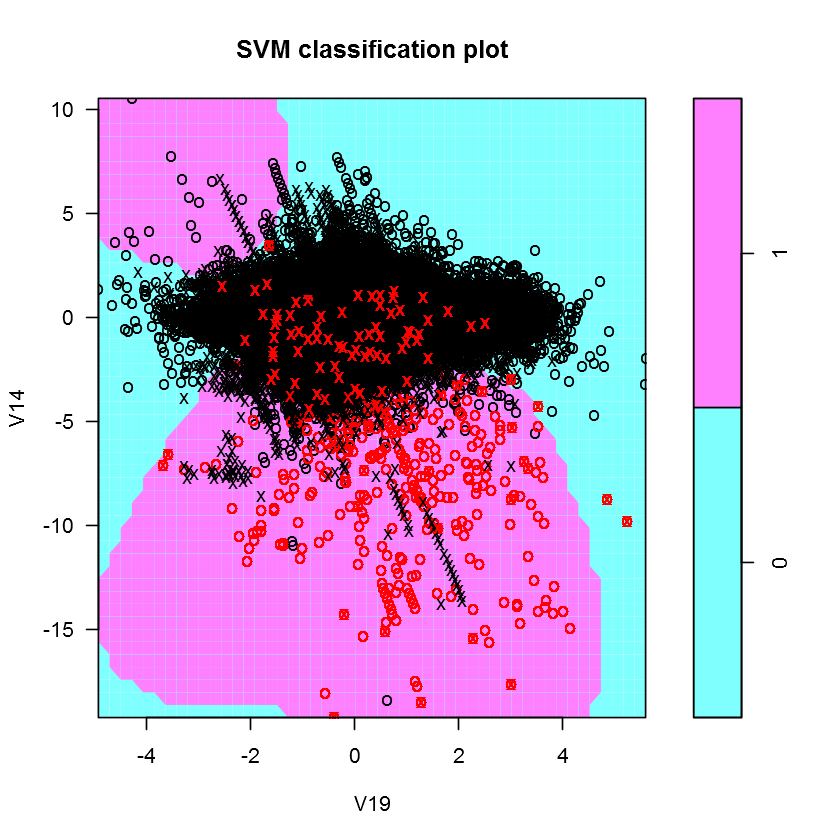

In [20]:
plot(classifier1, training, V14 ~ V19)

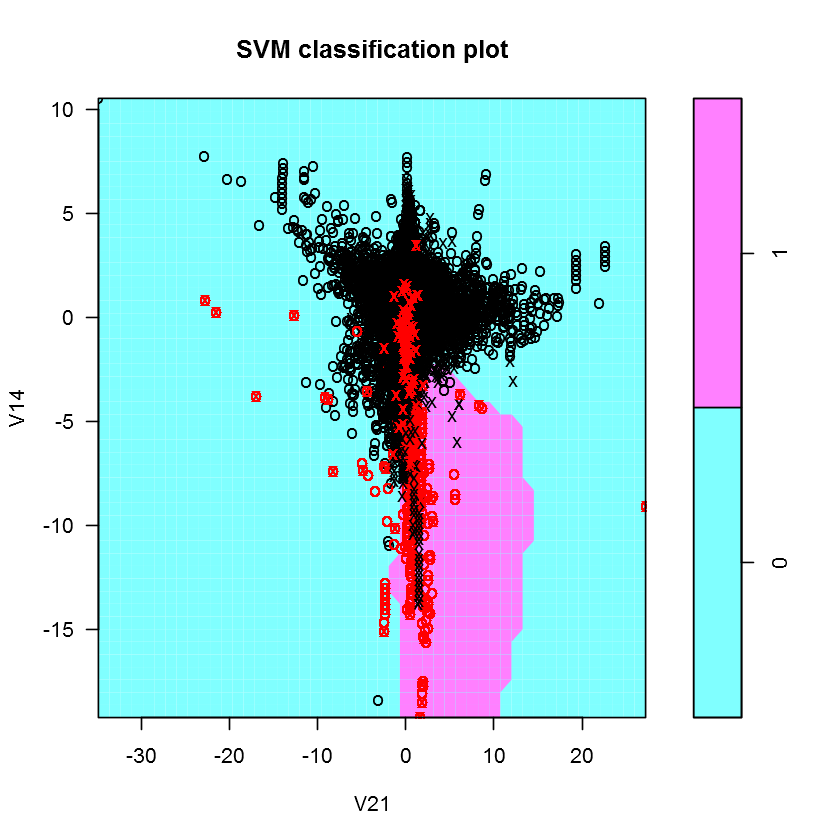

In [21]:
plot(classifier1, training, V14 ~ V21)

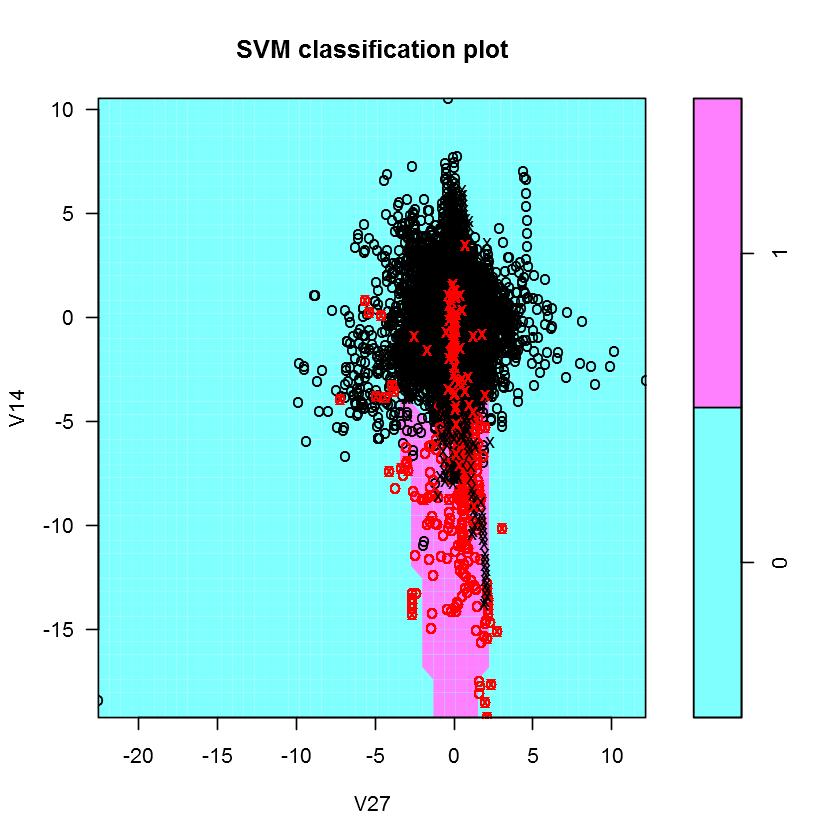

In [22]:
plot(classifier1, training, V14 ~ V27)

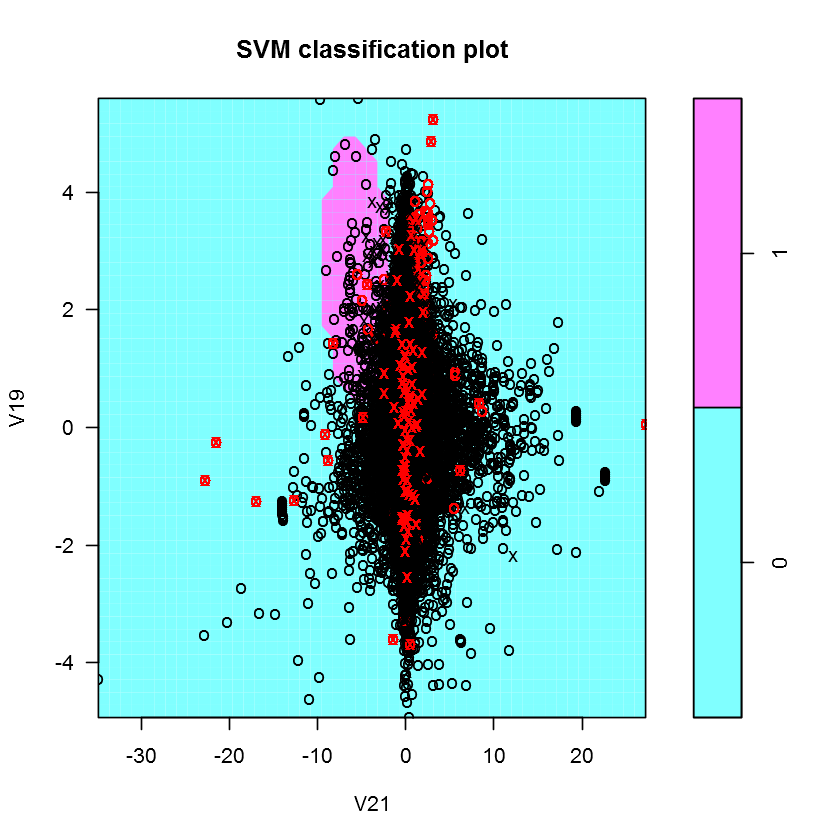

In [23]:
plot(classifier1, training, V19 ~ V21)

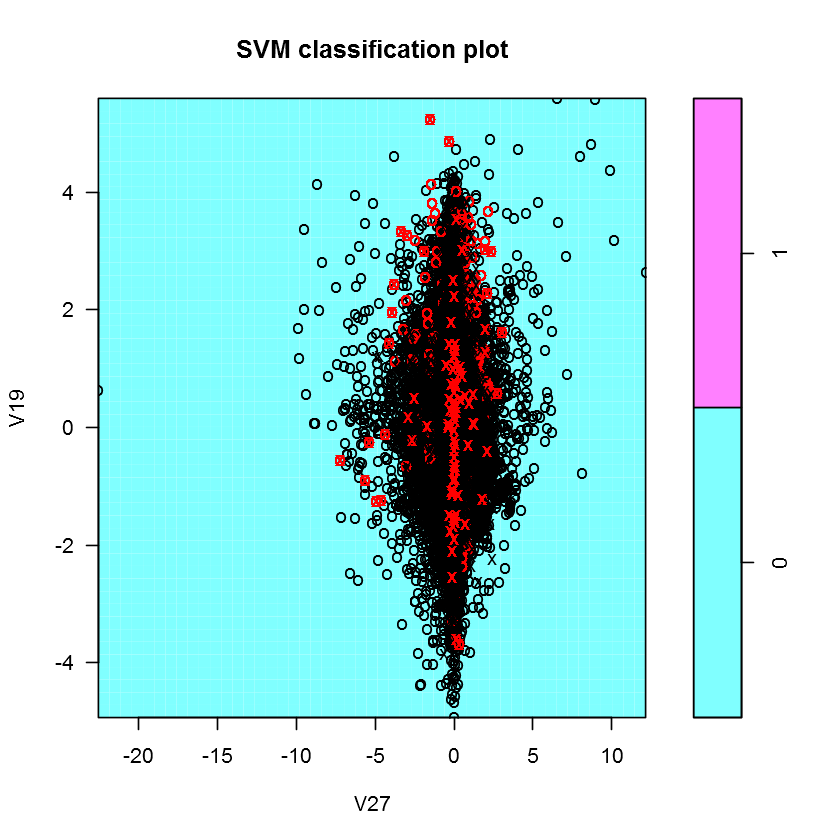

In [24]:
plot(classifier1, training, V19 ~ V27)

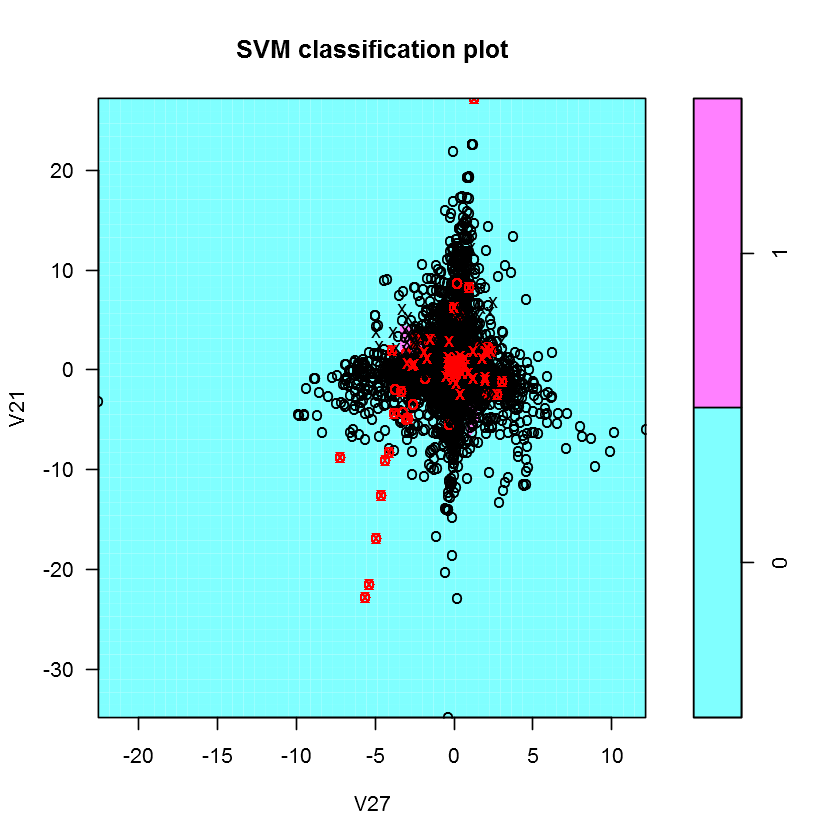

In [25]:
plot(classifier1, training, V21 ~ V27)

Warning message:
"package 'rpart' was built under R version 3.5.2"Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


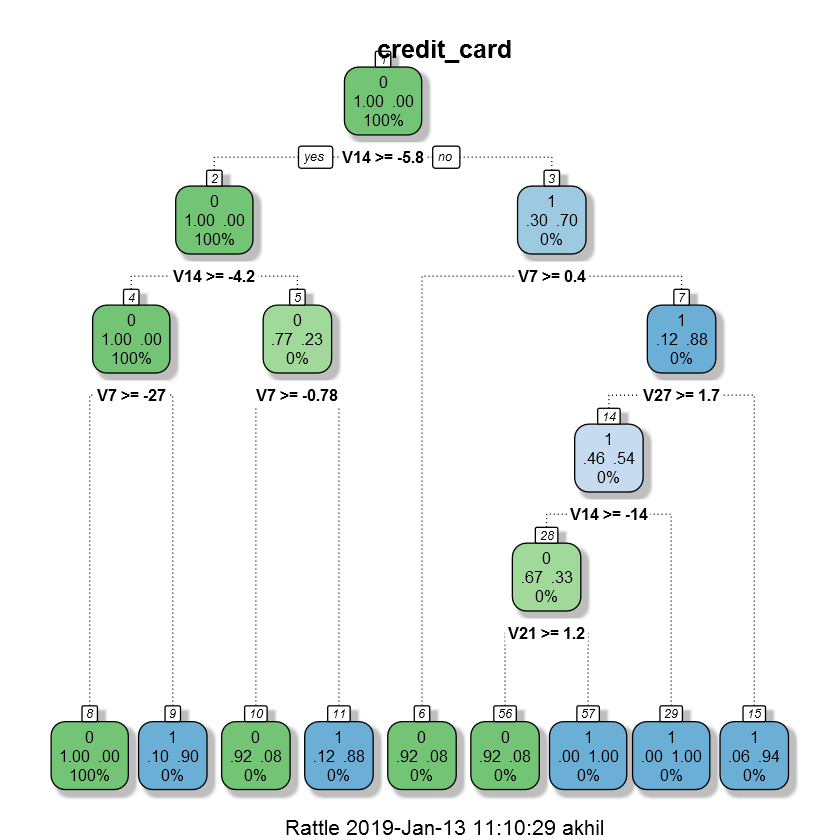

In [26]:
# load libraries
library(rpart)
library(rattle)
 
rpart <- rpart(Class ~ ., data=dataset, method="class",)

# plot decision tree
fancyRpartPlot(rpart, main="credit_card")

In [27]:
library(car)
car::vif(fit)

Loading required package: carData


V14       V7      V21 
1.011622 1.419589 1.427194